# Clasificación utilizando XGBoost (Core)




## Objetivo

Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

### Dataset:
El link dado en la página está malo
https://www.kaggle.com/datasets/ronitf/heart-disease-uci

Así que busqué uno que fuera sobre el mismo tema, desconozco así, si tienen las mismas características en observaciones o variables

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


**Descripción del Dataset:**
El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.



In [3]:
# Instalar la API de Kaggle
!pip install kaggle

# Crear el directorio para las credenciales de Kaggle
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d redwankarimsony/heart-disease-data
!unzip heart-disease-data.zip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
heart-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-disease-data.zip
replace heart_disease_uci.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#  1) Parte 1: Carga y Exploración Inicial de Datos

1. Carga del Dataset:
- Cargar el dataset desde Kaggle.
2. Exploración Inicial:
- Revisar la estructura del dataset.
- Describir las variables y su distribución.
- Identificar y documentar valores faltantes y outliers.




In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Lee el archivo CSV
df = pd.read_csv('/content/heart_disease_uci.csv')

In [24]:
df.shape

(920, 16)

In [25]:
print(df.info())
print("\n\n\n\n\n")
print(df.describe(include='all').round(2))
print("\n\n\n\n\n")
print("Valores nulos:")
print(df.isnull().sum() * 100 / len(df))
print("\n")
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None






            id     age   sex    dataset            cp  trestbps    chol  \
count   920.00  920.00   920        920    

In [26]:
# Eliminar columnas con más del 10% de valores nulos
threshold = 0.10
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 93.6+ KB
None


In [27]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        740 non-null    int64  
 1   age       740 non-null    int64  
 2   sex       740 non-null    object 
 3   dataset   740 non-null    object 
 4   cp        740 non-null    object 
 5   trestbps  740 non-null    float64
 6   chol      740 non-null    float64
 7   fbs       740 non-null    object 
 8   restecg   740 non-null    object 
 9   thalch    740 non-null    float64
 10  exang     740 non-null    object 
 11  oldpeak   740 non-null    float64
 12  num       740 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 80.9+ KB
None


In [28]:
df.shape

(740, 13)

In [29]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

uniq(df)

,val,types,len
feature,,,
id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,740
age,"[63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 5...",int64,50
sex,"[Male, Female]",object,2
dataset,"[Cleveland, Hungary, Switzerland, VA Long Beach]",object,4
cp,"[typical angina, asymptomatic, non-anginal, at...",object,4
trestbps,"[145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150...",float64,58
chol,"[233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268...",float64,208
fbs,"[True, False]",object,2
restecg,"[lv hypertrophy, normal, st-t abnormality]",object,3


In [30]:
df = df.drop('id', axis=1)

df = df.rename(columns={'dataset': 'origin'})

In [31]:
# Detectar outliers en variables numéricas (no está incluida selección de columnas numéricas)
def outliers_IQR(df):
    for col in df:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1               # Interquartile range

        # Definir los límites inferior y superior de los valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚩 Outliers detected in {col}: {outliers.shape[0]}")

        # Opcional: Remover outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# ***IQR (Rango Intercuartílico)*** medida de dispersión estadística que ayuda a ID valores atípicos (outliers)

outliers_IQR(df.select_dtypes(include=['int', 'float']))


🚩 Outliers detected in age: 0

🚩 Outliers detected in trestbps: 24

🚩 Outliers detected in chol: 97

🚩 Outliers detected in thalch: 1

🚩 Outliers detected in oldpeak: 15

🚩 Outliers detected in num: 100


In [32]:
unique_values_origin = df['num'].value_counts()
unique_values_origin

,count
num,
0,357
1,204
2,79
3,78
4,22


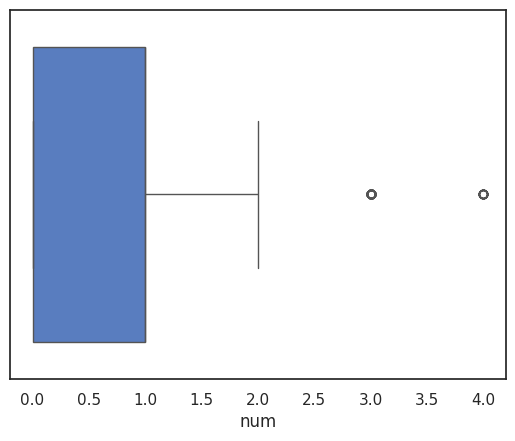

In [33]:
sns.boxplot(x=df['num'])
plt.show()

Del Kaggle
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

Column Descriptions:
1.	id (Unique id for each patient)

2.	age (Age of the patient in years)

3.	origin (place of study)

4.	sex (Male/Female)

5.	cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

6.	trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

7.	chol (serum cholesterol in mg/dl)

8.	fbs (if fasting blood sugar > 120 mg/dl)

9.	restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]

10.	thalach: maximum heart rate achieved

11.	exang: exercise-induced angina (True/ False)

12.	oldpeak: ST depression induced by exercise relative to rest

13.	slope: the slope of the peak exercise ST segment

14.	ca: number of major vessels (0-3) colored by fluoroscopy

15.	thal: [normal; fixed defect; reversible defect]

16.	num: the predicted attribute


### Análisis:
Se hicieron revisiones preliminares y se trabajaron datos nulos, además no hay duplicados y los outliers en las columnas que fueron positivas no considero tratarlos, debido a que son "mediciones" que en algunos casos pueden ser por equipos o herramientas, pero también escalas numéricas nominales que no sería posible transformar o que eliminar estos outliers implica pérdida de datos, más aún que la variable objetivo (num) que es donde se presenta este inconveniente, tiene clases desbalanceadas y se eliminarían dos "clases" que son necesarias para los análisis (3 y 4)

- Datos nulos:
    - Antes de tratar nulos: (920, 16)
    - Después de tratar nulos: (740, 13)
        - Aproximadamente el 20% de los datos eliminados


 num = [0=no heart disease; 1,2,3,4 = stages of heart disease ]

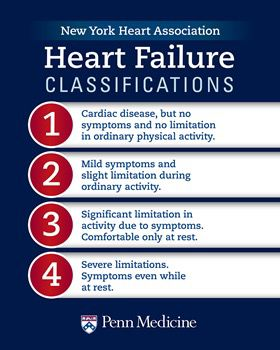

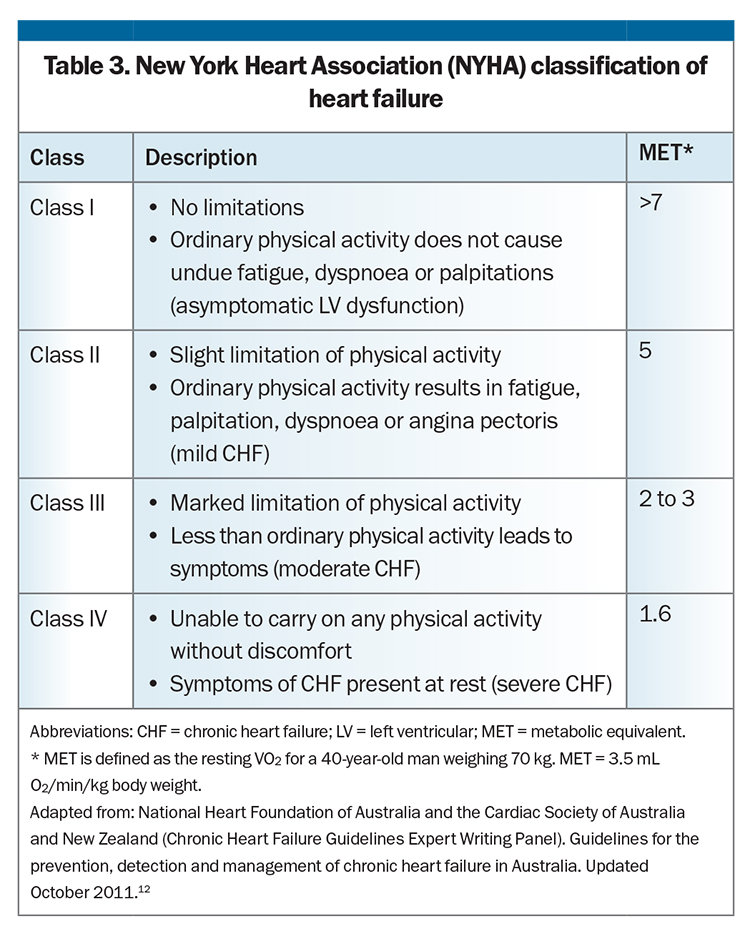

# 2) Parte 2: Análisis Exploratorio de Datos (EDA)

1. Análisis Estadístico Descriptivo:
- Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
- Analizar la distribución de las variables categóricas.
2. Visualizaciones:
- Crear histogramas y gráficos de barras para entender la distribución de las variables.
- Crear un mapa de calor para visualizar las correlaciones entre las variables.
- Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.
3. Valores Faltantes y Outliers:
- Detectar y tratar valores faltantes.
- Identificar y manejar outliers.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       740 non-null    int64  
 1   sex       740 non-null    object 
 2   origin    740 non-null    object 
 3   cp        740 non-null    object 
 4   trestbps  740 non-null    float64
 5   chol      740 non-null    float64
 6   fbs       740 non-null    object 
 7   restecg   740 non-null    object 
 8   thalch    740 non-null    float64
 9   exang     740 non-null    object 
 10  oldpeak   740 non-null    float64
 11  num       740 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 75.2+ KB


In [35]:
df.describe().round()

,age,trestbps,chol,thalch,oldpeak,num
count,740.0,740.0,740.0,740.0,740.0,740.0
mean,53.0,133.0,220.0,139.0,1.0,1.0
std,9.0,19.0,94.0,26.0,1.0,1.0
min,28.0,0.0,0.0,60.0,-1.0,0.0
25%,46.0,120.0,197.0,120.0,0.0,0.0
50%,54.0,130.0,231.0,140.0,0.0,1.0
75%,60.0,140.0,271.0,159.0,2.0,1.0
max,77.0,200.0,603.0,202.0,6.0,4.0


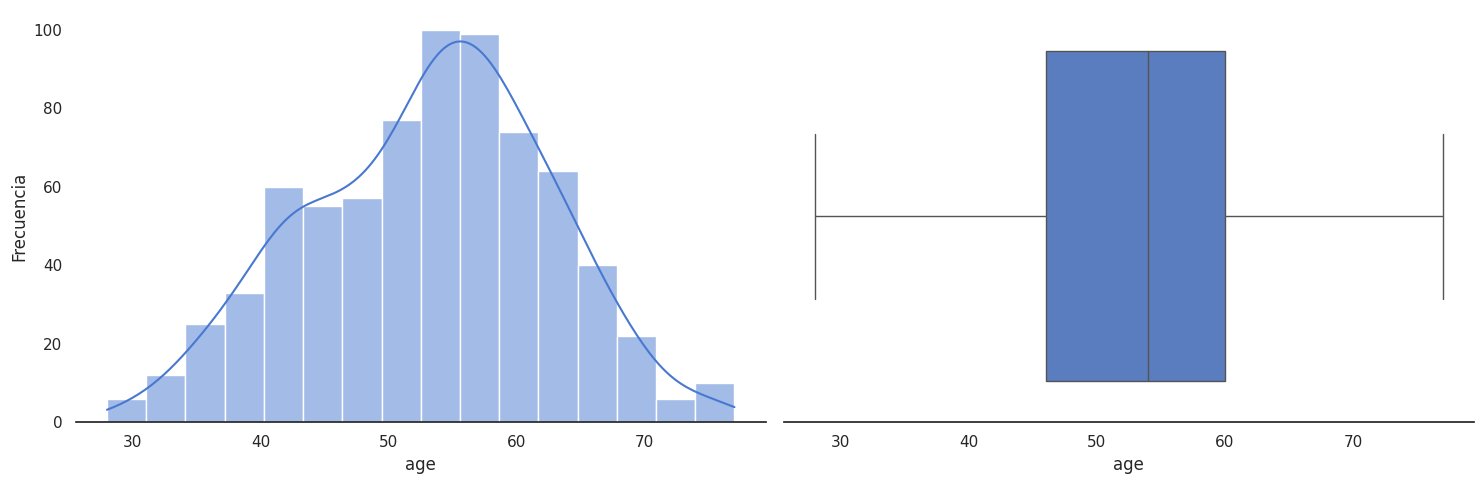

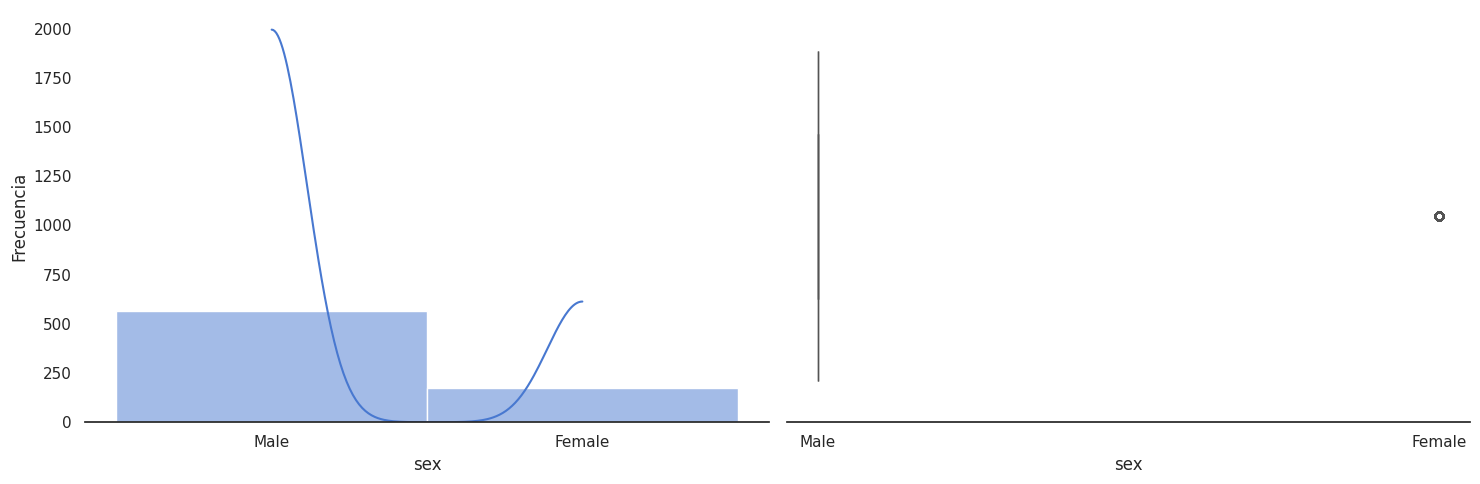

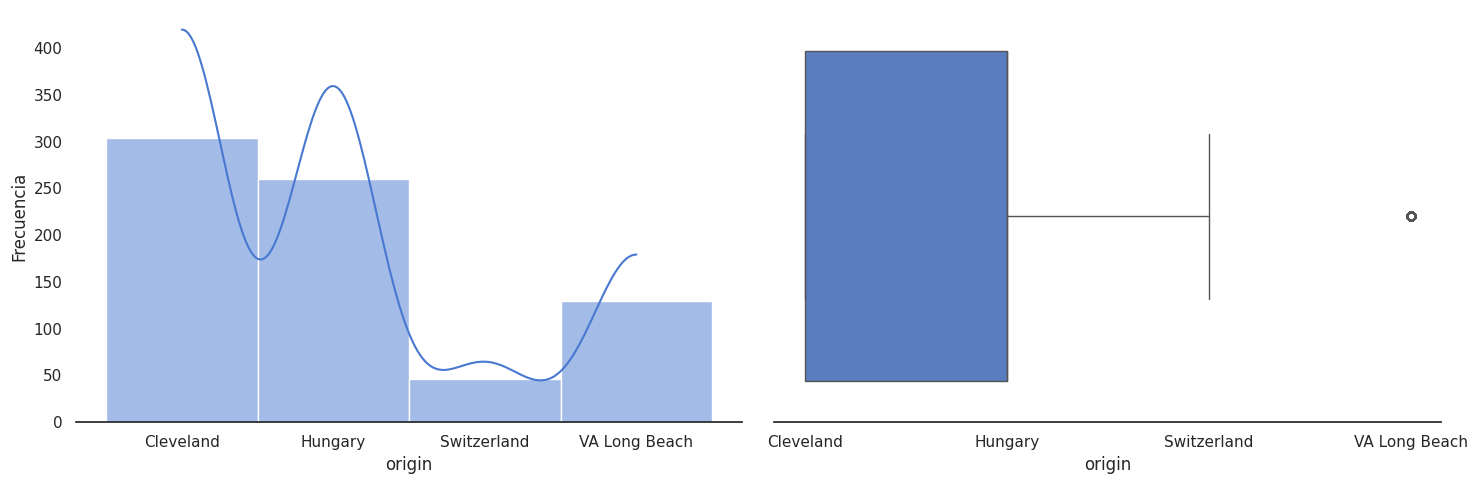

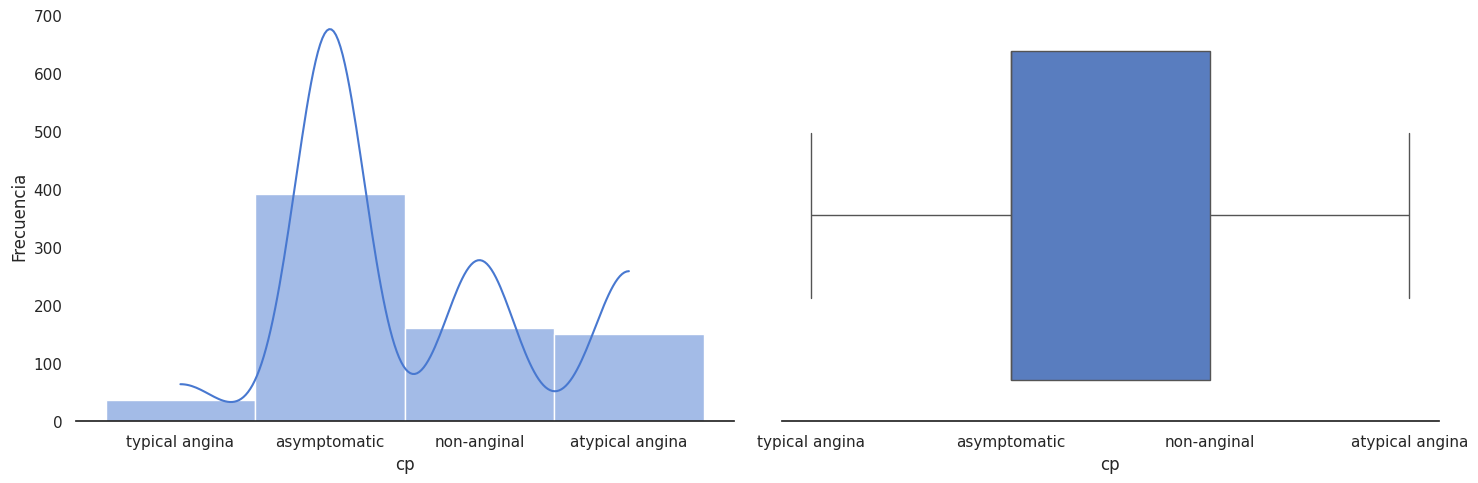

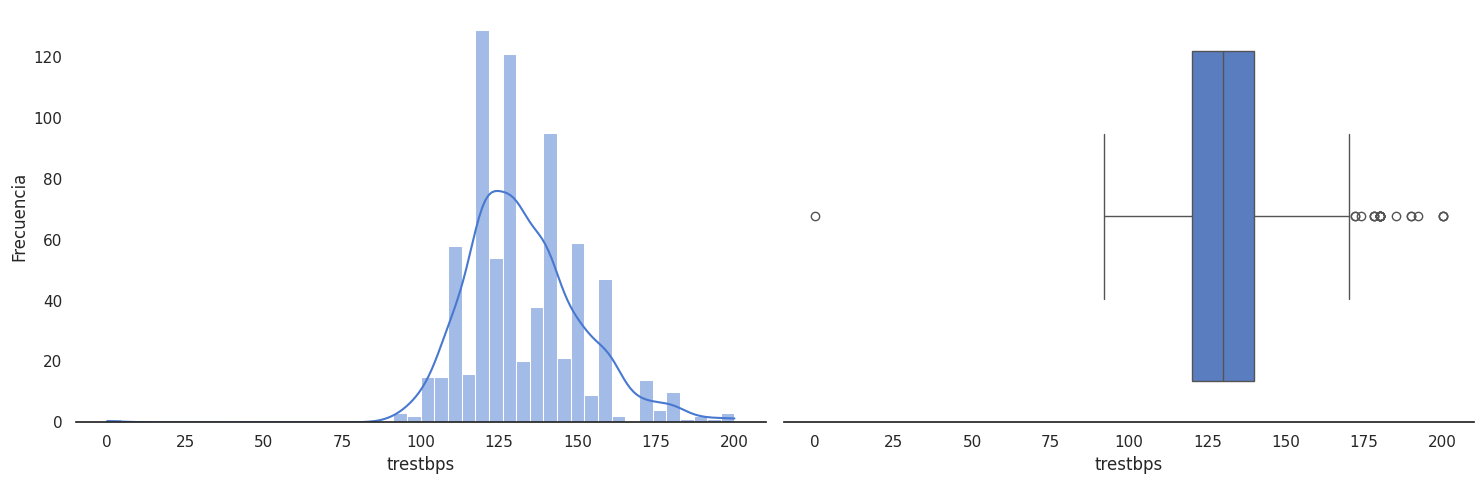

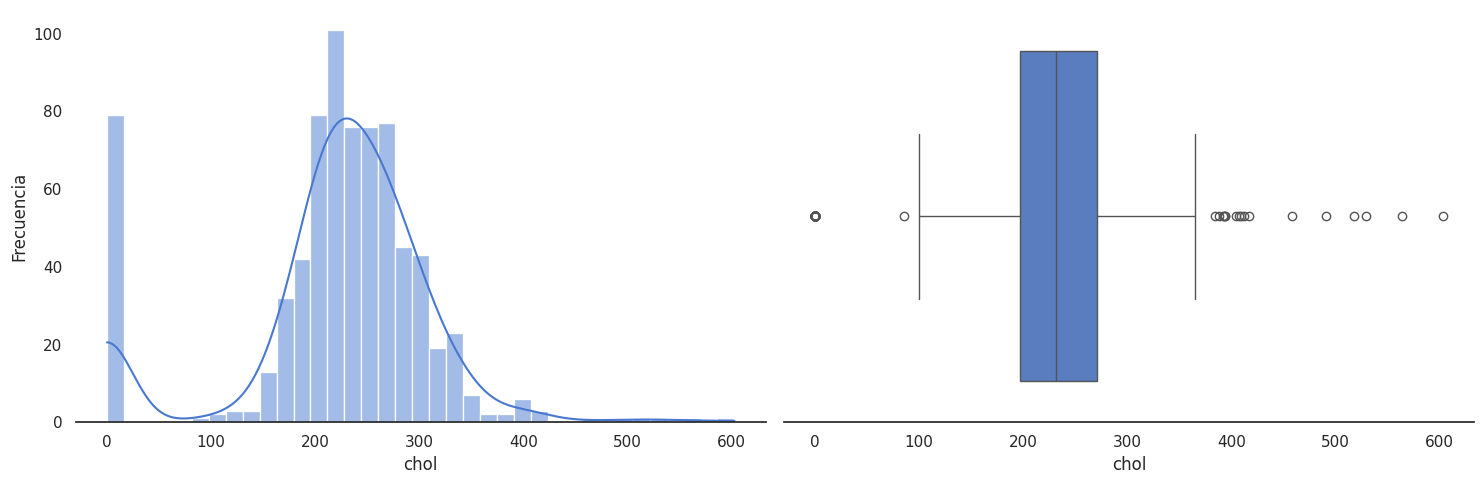

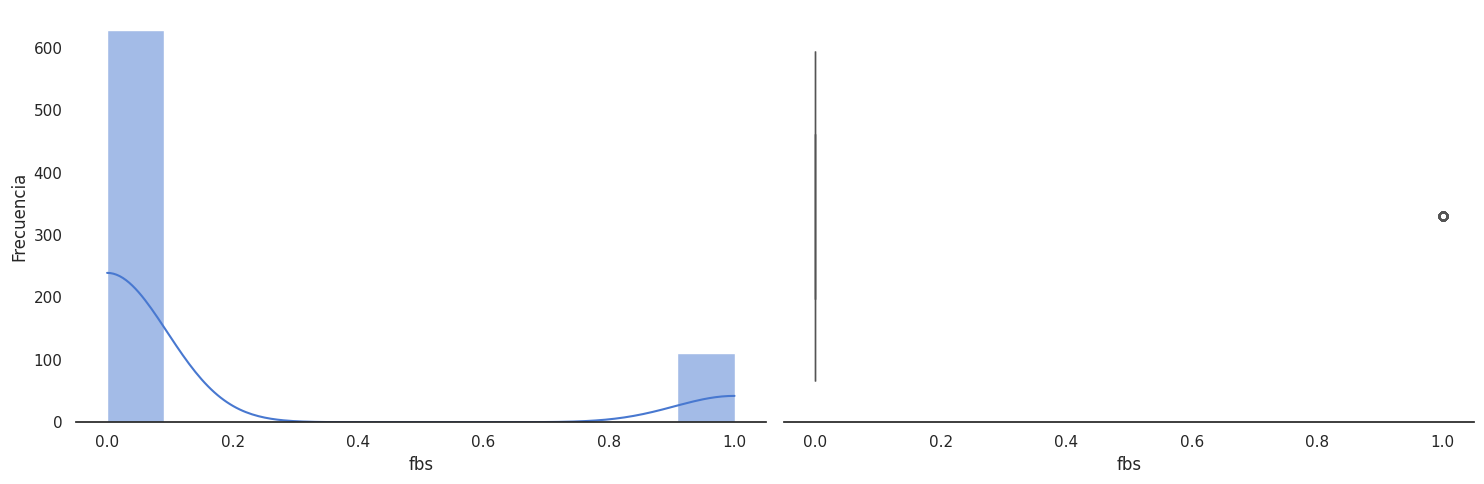

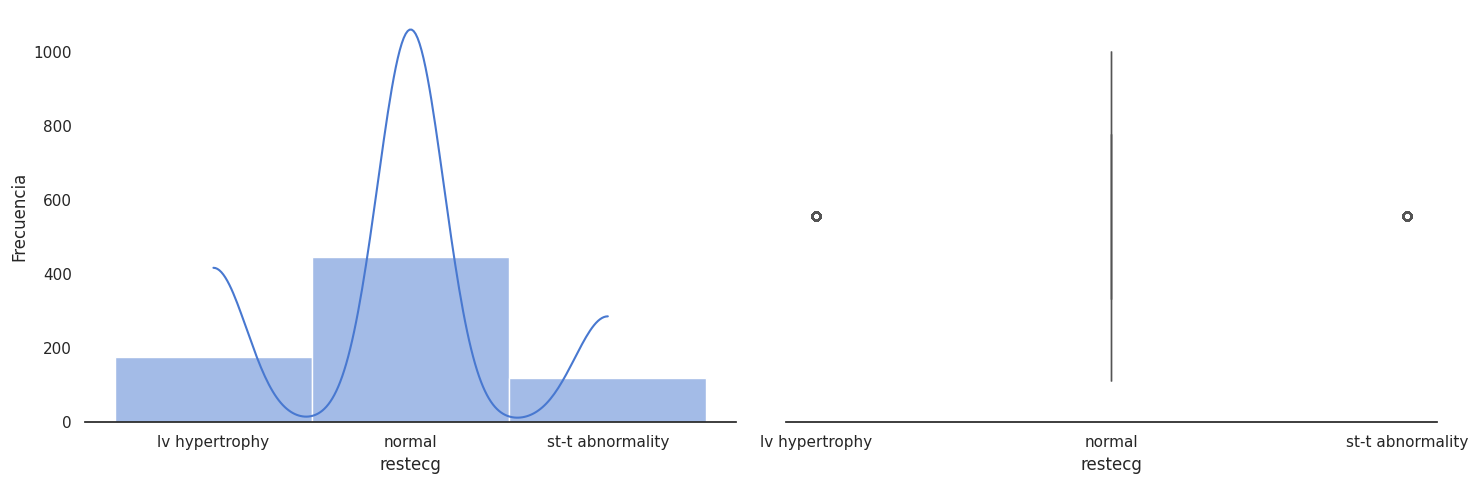

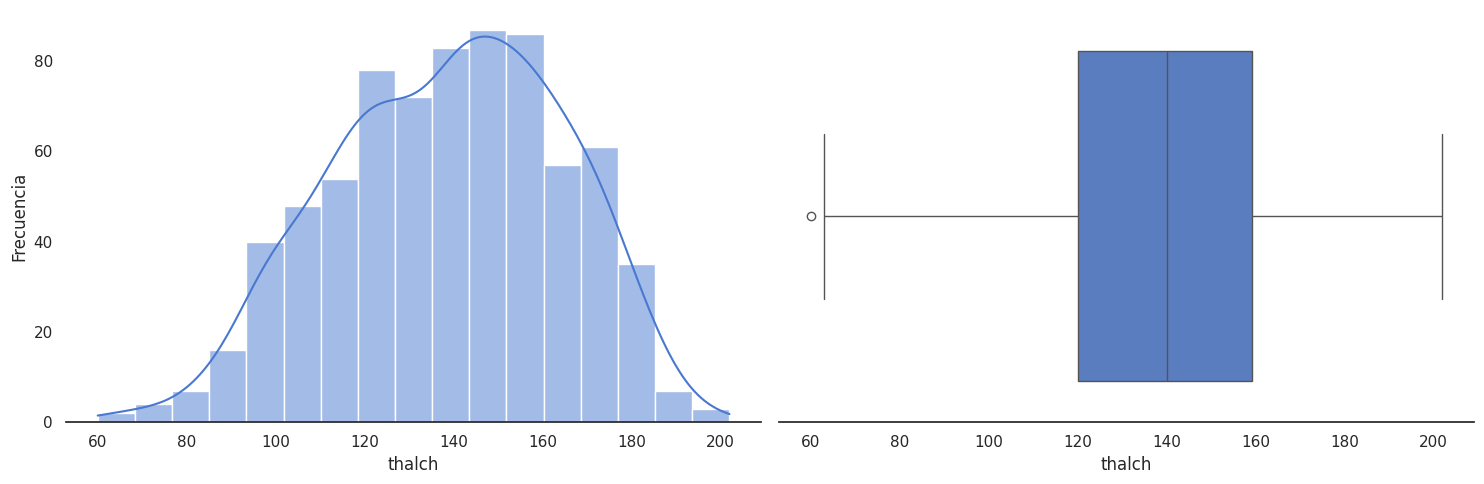

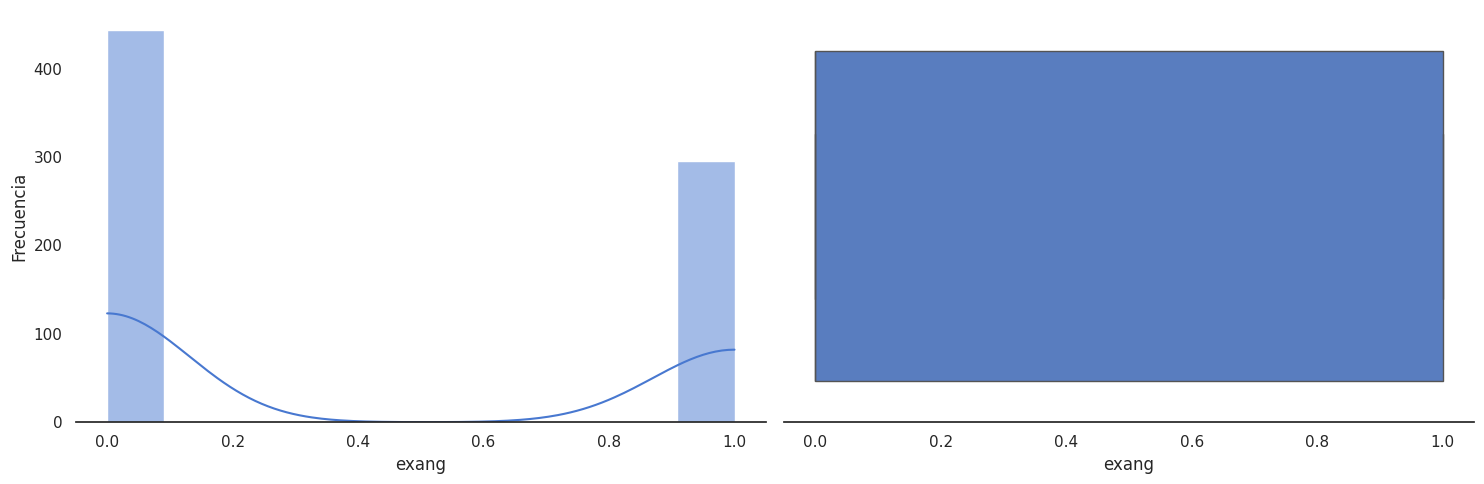

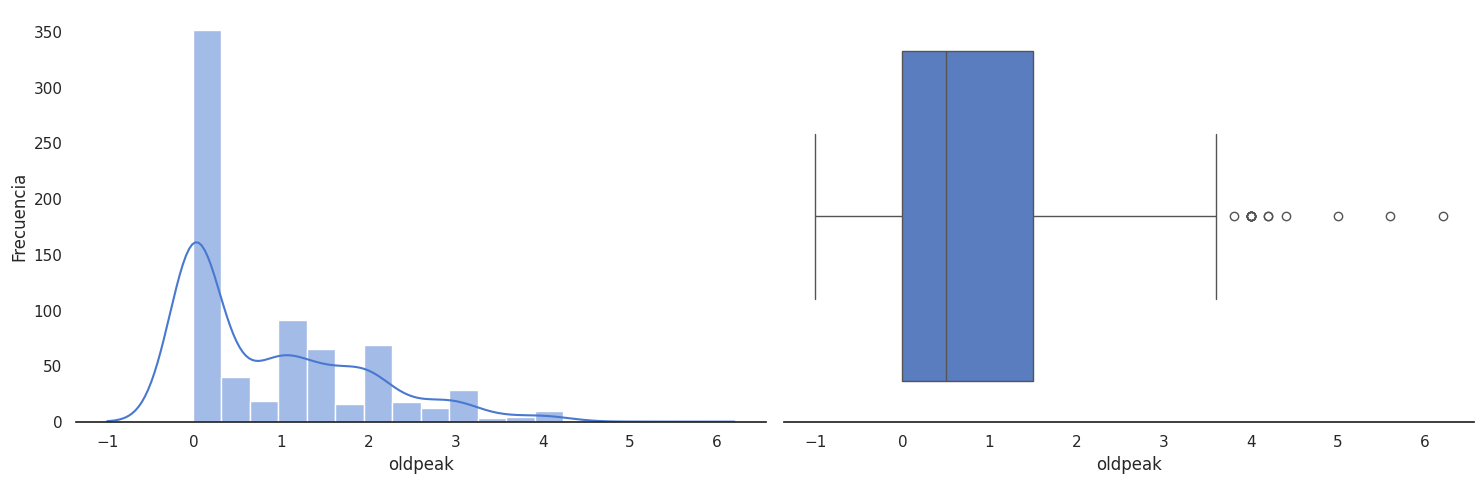

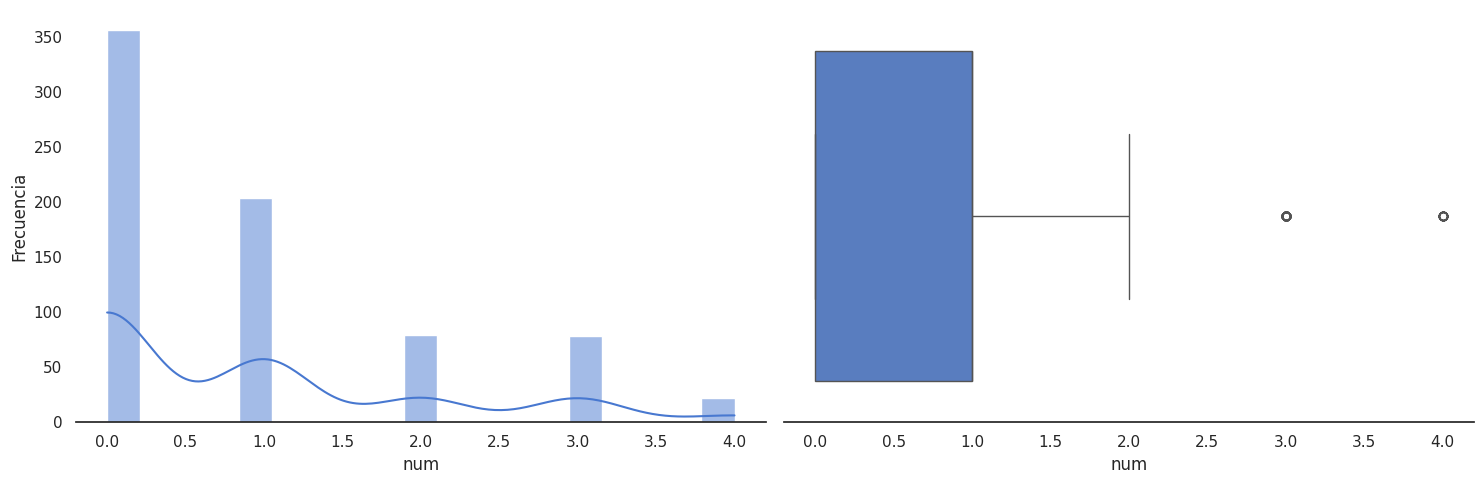

In [36]:
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

vis_hist_boxplot(df)

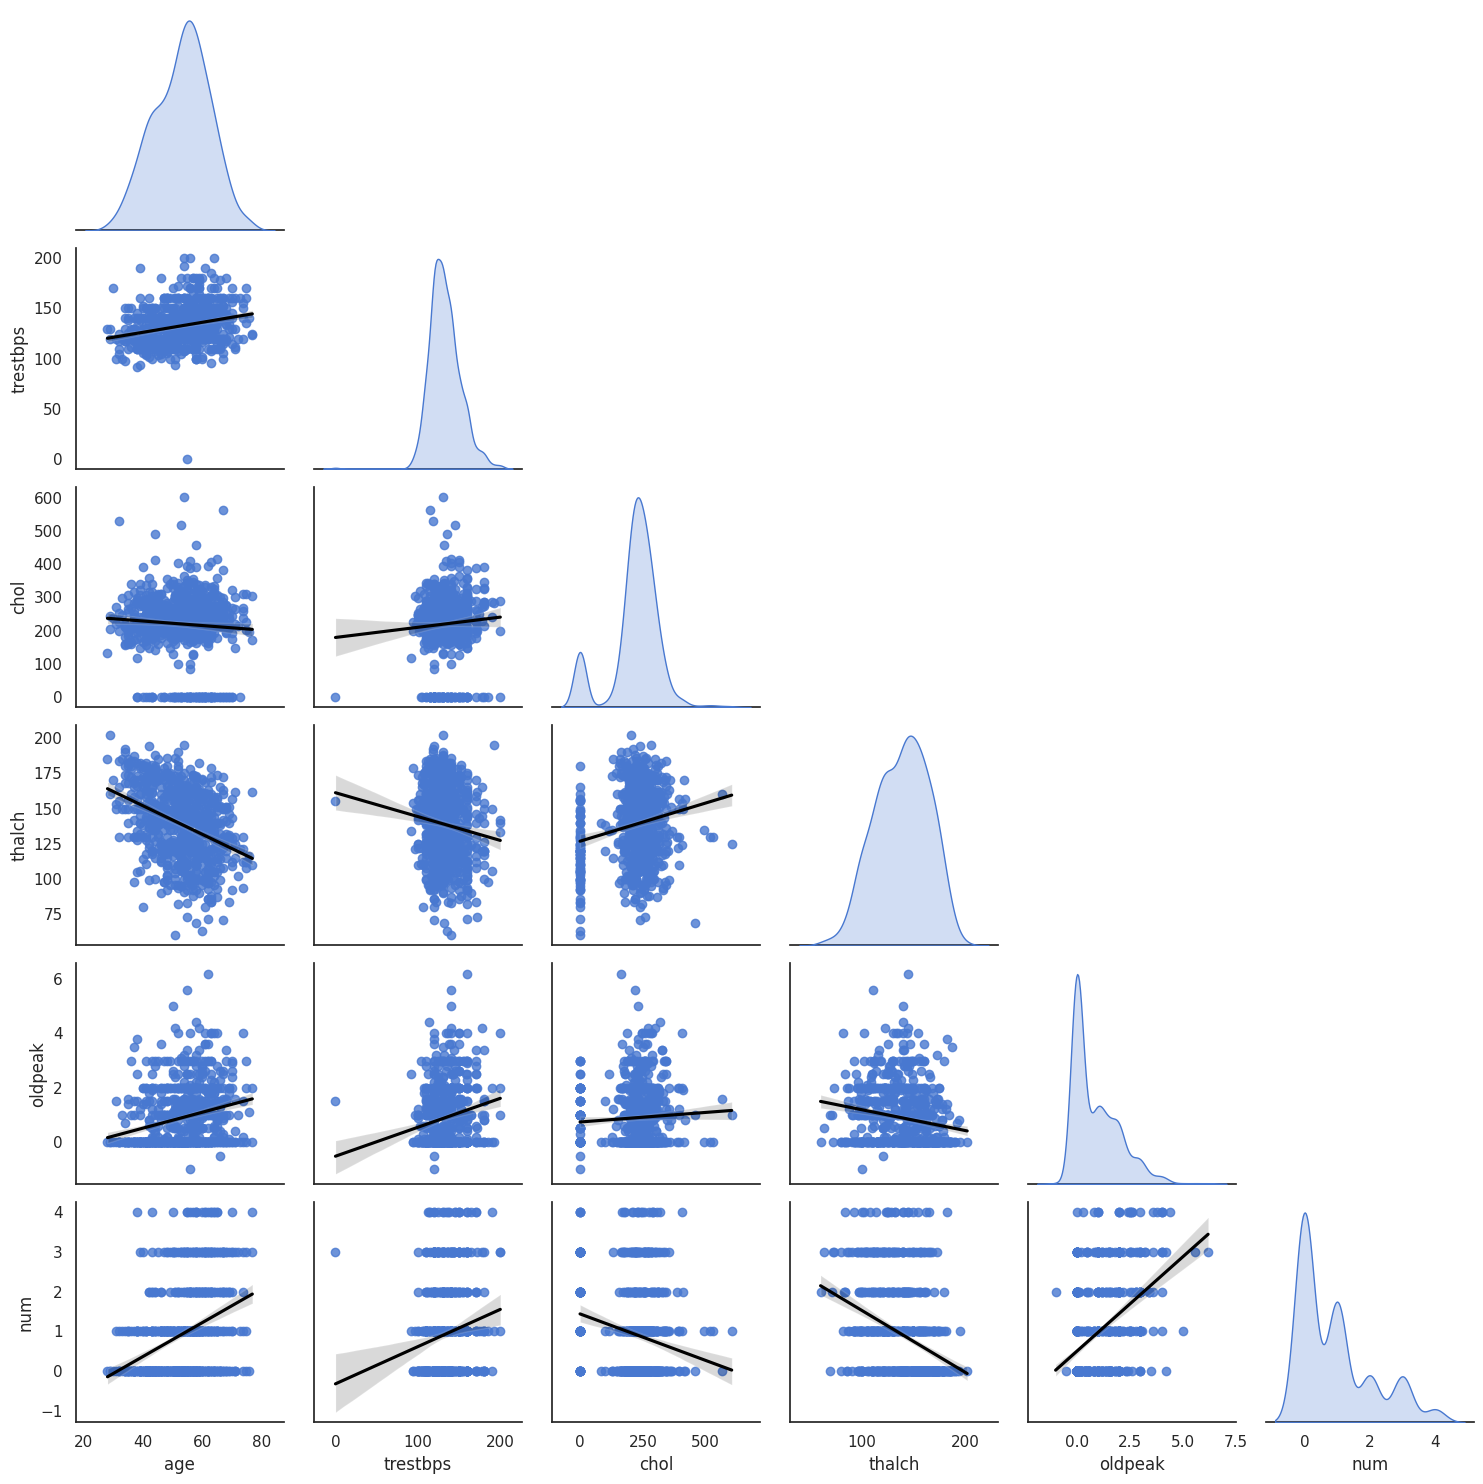

In [37]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'black'}},corner=True)
plt.tight_layout()
plt.show()

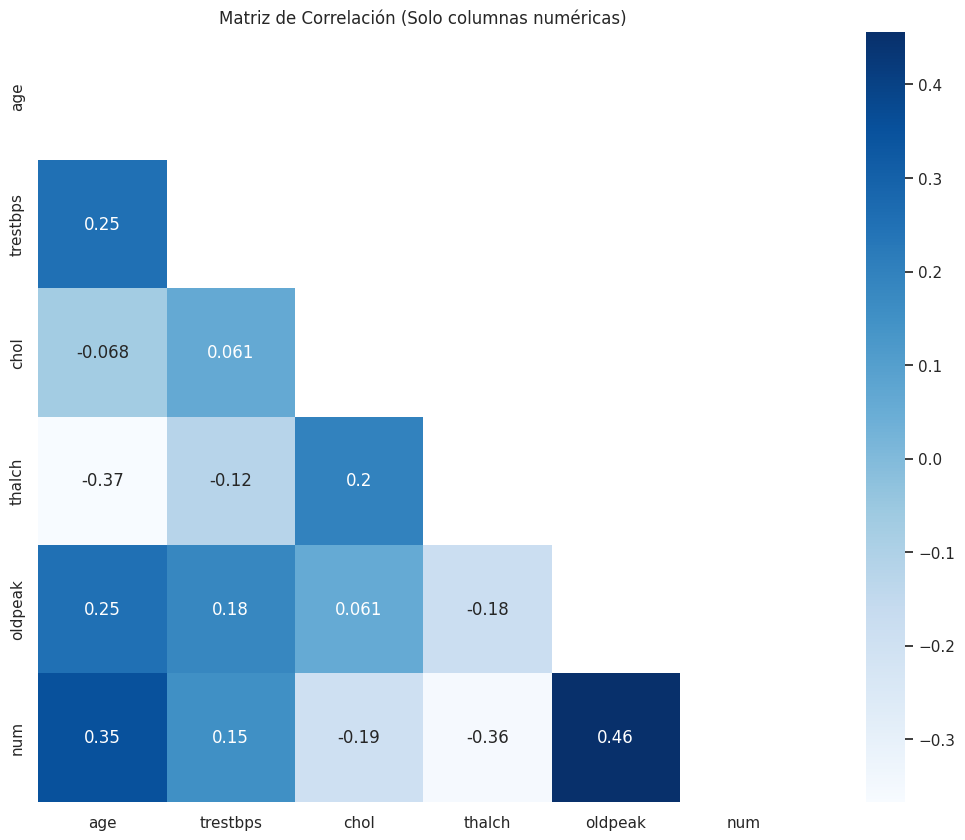

In [38]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Crear una máscara para ocultar la parte superior del triángulo
mask = np.zeros_like(df_numeric.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True

# Configurar el tamaño de la figura y graficar el heatmap
plt.figure(figsize=[15, 10])
sns.heatmap(data=df_numeric.corr(), annot=True, mask=mask, cmap='Blues', square=True)
plt.title('Matriz de Correlación (Solo columnas numéricas)')
plt.show()

In [39]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(var1, var2):
    crosstab = pd.crosstab(var1, var2)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    min_dim = min(crosstab.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Seleccionar todas las columnas categóricas excepto la variable objetivo
target_col = 'num'
categorical_cols = df.select_dtypes(include=['object','int','float']).columns
other_cols = [col for col in categorical_cols if col != target_col]

# Calcular V de Cramer para cada columna con respecto a SalePrice
cramer_scores = {}
for col in other_cols:
    cramer_scores[col] = cramers_v(df[target_col], df[col])

# Convertir a Series y ordenar
cramer_results = pd.Series(cramer_scores).sort_values(ascending=False)

print(f"\nAsociaciones con {target_col} usando V de Cramer:")
print(cramer_results)


Asociaciones con num usando V de Cramer:
chol        0.535232
exang       0.497558
thalch      0.432180
oldpeak     0.402683
trestbps    0.330979
origin      0.308636
cp          0.307879
sex         0.301437
age         0.298472
restecg     0.157173
fbs         0.154225
dtype: float64


### Análisis:
-	Si bien al inicio se decidió no tratar los outliers, en el momento de revisar las estadísticas llama la atención hay valores de cero, negativos o muy altos (comparando entre el 75% (q3) y el 100%)
-	Revisando las distribuciones en los histogramas y boxplots, se puede apreciar que la mayoría de registros en el dataset corresponde a hombres, que el rango de edad es amplio, en cuanto al origen de la información hay un desbalanceo de clases, igual que con cp, con trestbps y chol se nota la evidencia de outliers tanto hacía arriba, como valores de 0, lo cual supondría yo no es posible (¿no están vivos? ¿Estos valores no deberían ser o tener un “rango normal” que no incluya cero), y así con otras que no presumo grandes diferencias, pero con la variable objetivo si sería bueno revisar los outliers
-	Todo esto porque, esos valores “extremos” dentro de un modelo, pueden ser posibles, pero no son “lo normal”, así que de tener el mejor modelo para “condiciones normales” sería ideal no tener estos casos “extraordinarios” que me gustaría revisar puntualmente
-	num tiene correlación con las otras variables numéricas, pero si bien es una escala oridinal y no continua la mejor correlación se da con las variables con características similares, así que es necesario escalar características para el modelaje.
-	Si se trata num (variable objetivo) como categórica y se le analiza por Cramer (Chi cuadrado), hay correlaciones a considerar con el resto de las variables


## Correcciones necesarias y justificadas


-	Consultando con personal de la salud y con Claude, se confirman suposiciones iniciales, a manera de resumen:
    -	Trestbps y chol no pueden tomar valores de cero, estos valores deberían ser tratados como datos faltantes o errores

- límites razonables:
    - trestbps: >70 mm Hg
    - chol: >100 mg/dl
    - thalach: 60-220 bpm
    - oldpeak: mantener como está


In [40]:
def explore_null_columns(df):

    for col in df.columns:
        #if df[col].isnull().any():
            print(f"Columna: {col}")
            print(f"Valores únicos (incluyendo nulos):\n{df[col].value_counts(dropna=False)}")
            print("-" * 20)

explore_null_columns(df)

Columna: age
Valores únicos (incluyendo nulos):
age
54    43
58    38
55    33
57    31
56    30
52    30
59    28
51    25
60    24
53    24
48    24
63    23
62    23
50    22
46    22
43    22
41    22
61    22
44    19
64    18
49    17
47    16
42    16
65    15
45    14
67    14
39    13
66    11
37    11
40    10
38    10
35     9
68     8
69     7
70     7
34     6
36     5
32     4
71     4
74     4
75     3
31     2
33     2
29     2
77     2
28     1
30     1
76     1
73     1
72     1
Name: count, dtype: int64
--------------------
Columna: sex
Valores únicos (incluyendo nulos):
sex
Male      566
Female    174
Name: count, dtype: int64
--------------------
Columna: origin
Valores únicos (incluyendo nulos):
origin
Cleveland        304
Hungary          260
VA Long Beach    130
Switzerland       46
Name: count, dtype: int64
--------------------
Columna: cp
Valores únicos (incluyendo nulos):
cp
asymptomatic       392
non-anginal        161
atypical angina    150
typical angina  

In [41]:
def explore_null_columns_sorted(df):

    for col in df.columns:
        print(f"Columna: {col}")
        # Ordenar los valores únicos por los valores mismos (índice)
        sorted_values = df[col].value_counts(dropna=False).sort_index()
        print(f"Valores únicos (incluyendo nulos, ordenados):\n{sorted_values}")
        print("-" * 20)

explore_null_columns_sorted(df)

Columna: age
Valores únicos (incluyendo nulos, ordenados):
age
28     1
29     2
30     1
31     2
32     4
33     2
34     6
35     9
36     5
37    11
38    10
39    13
40    10
41    22
42    16
43    22
44    19
45    14
46    22
47    16
48    24
49    17
50    22
51    25
52    30
53    24
54    43
55    33
56    30
57    31
58    38
59    28
60    24
61    22
62    23
63    23
64    18
65    15
66    11
67    14
68     8
69     7
70     7
71     4
72     1
73     1
74     4
75     3
76     1
77     2
Name: count, dtype: int64
--------------------
Columna: sex
Valores únicos (incluyendo nulos, ordenados):
sex
Female    174
Male      566
Name: count, dtype: int64
--------------------
Columna: origin
Valores únicos (incluyendo nulos, ordenados):
origin
Cleveland        304
Hungary          260
Switzerland       46
VA Long Beach    130
Name: count, dtype: int64
--------------------
Columna: cp
Valores únicos (incluyendo nulos, ordenados):
cp
asymptomatic       392
atypical angina   

In [42]:
# Revisar casos con presión arterial 0 o muy alta
print("Casos con trestbps = 0:")
print(df[df['trestbps'] == 0])

print("\n\n\nCasos con trestbps > 180:")
print(df[df['trestbps'] > 180].sort_values('trestbps', ascending=False))

Casos con trestbps = 0:
     age   sex         origin           cp  trestbps  chol    fbs restecg  \
753   55  Male  VA Long Beach  non-anginal       0.0   0.0  False  normal   

     thalch  exang  oldpeak  num  
753   155.0  False      1.5    3  



Casos con trestbps > 180:
     age     sex         origin               cp  trestbps   chol    fbs  \
126   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
548   54    Male        Hungary     asymptomatic     200.0  198.0  False   
701   64  Female    Switzerland     asymptomatic     200.0    0.0  False   
188   54    Male      Cleveland  atypical angina     192.0  283.0  False   
338   39    Male        Hungary  atypical angina     190.0  241.0  False   
896   61    Male  VA Long Beach     asymptomatic     190.0  287.0   True   
700   63    Male    Switzerland     asymptomatic     185.0    0.0  False   

            restecg  thalch  exang  oldpeak  num  
126  lv hypertrophy   133.0   True      4.0    3  
548        

In [43]:
# Revisar casos con colesterol 0 o extremadamente alto
print("Casos con colesterol = 0:")
print(df[df['chol'] == 0])

Casos con colesterol = 0:
     age     sex         origin              cp  trestbps  chol    fbs  \
602   38  Female    Switzerland    asymptomatic     110.0   0.0  False   
604   38    Male    Switzerland     non-anginal     115.0   0.0  False   
610   42    Male    Switzerland    asymptomatic     145.0   0.0  False   
612   43    Male    Switzerland    asymptomatic     115.0   0.0  False   
613   43    Male    Switzerland    asymptomatic     140.0   0.0  False   
..   ...     ...            ...             ...       ...   ...    ...   
787   58    Male  VA Long Beach    asymptomatic     120.0   0.0  False   
796   49    Male  VA Long Beach  typical angina     130.0   0.0  False   
812   67    Male  VA Long Beach    asymptomatic     120.0   0.0   True   
818   43    Male  VA Long Beach    asymptomatic     122.0   0.0  False   
819   63    Male  VA Long Beach     non-anginal     130.0   0.0   True   

              restecg  thalch  exang  oldpeak  num  
602            normal   156.0  F

In [44]:
# Casos con colesterol > 490 - aquí deberíamos ver otras variables
# como edad, presión arterial, etc. para evaluar si es plausible
print("Casos con colesterol > 500:")
print(df[df['chol'] > 490].sort_values('chol', ascending=False))

Casos con colesterol > 500:
     age     sex     origin            cp  trestbps   chol    fbs  \
546   54    Male    Hungary  asymptomatic     130.0  603.0   True   
152   67  Female  Cleveland   non-anginal     115.0  564.0  False   
528   32    Male    Hungary  asymptomatic     118.0  529.0  False   
568   53    Male    Hungary   non-anginal     145.0  518.0  False   
584   44    Male    Hungary  asymptomatic     135.0  491.0  False   

            restecg  thalch  exang  oldpeak  num  
546          normal   125.0   True      1.0    1  
152  lv hypertrophy   160.0  False      1.6    0  
528          normal   130.0  False      0.0    1  
568          normal   130.0  False      0.0    1  
584          normal   135.0  False      0.0    1  


In [45]:
df = df[df['trestbps'] != 0] #Sin eliminar chol = 0

In [46]:
df = df[df['chol'] != 0] #Después de eliminar chol = 0

In [47]:
df

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,1
914,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,2
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2


### Análisis:
En la limpieza inicial, se pasód e 919 entradas a 740, si se retiran las 79 entradas erroneas donde chol es igual a cero se disminuye aproximadamente el 11% de los datos, así que se deja un df con estos registros eliminados

# 3) Parte 3: Preprocesamiento de Datos

1. Transformación de Columnas:
- Codificar variables categóricas utilizando One-Hot Encoding.
- Escalar características numéricas utilizando StandardScaler.
2. División del Conjunto de Datos:
- Dividir el dataset en conjuntos de entrenamiento y prueba.

In [48]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, exclude_columns=None):

    # Crear una copia del DataFrame
    df_encoded = df.copy()

    # Diccionario para guardar el mapeo de cada columna
    label_mapping = {}

    # Asegurar que exclude_columns sea una lista o un conjunto vacío
    if exclude_columns is None:
        exclude_columns = []

    # Identificar columnas categóricas (object o category) y excluir las columnas especificadas
    categorical_columns = [
        col for col in df.select_dtypes(include=['object', 'category']).columns
        if col not in exclude_columns
    ]

    # Aplicar Label Encoder a cada columna categórica
    for column in categorical_columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df[column])

        # Guardar el mapeo de valores para esta columna
        label_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

    return df_encoded, label_mapping


In [49]:
df, mappings = encode_categorical_columns(df, exclude_columns='num')


In [50]:
df

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,1,2,0,158.0,170.0,0,2,138.0,1,0.0,1
914,46,1,2,0,134.0,310.0,0,1,126.0,0,0.0,2
915,54,0,2,0,127.0,333.0,1,2,154.0,0,0.0,1
917,55,1,2,0,122.0,223.0,1,2,100.0,0,0.0,2


In [51]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_numeric_columns_excluding_encoded(df, exclude_columns=None, encoded_columns=None):

    # Crear una copia del DataFrame
    df_scaled = df.copy()

    # Identificar columnas numéricas originales
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Excluir columnas especificadas y codificadas
    if exclude_columns:
        numeric_columns = [col for col in numeric_columns if col not in exclude_columns]
    if encoded_columns:
        numeric_columns = [col for col in numeric_columns if col not in encoded_columns]

    # Crear y ajustar el scaler
    scaler = StandardScaler()
    if numeric_columns:
        df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    return df_scaled, scaler, numeric_columns

In [52]:
df, scaler, numeric_columns = scale_numeric_columns_excluding_encoded(
    df,
    exclude_columns=['num'],
    encoded_columns=['sex', 'origin', 'cp', 'fbs', 'restecg', 'exang']
)

In [53]:
df

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1.099316,1,0,3,0.686565,-0.233580,1,0,0.352488,0,1.264344,0
1,1.522647,1,0,0,1.530096,0.687099,0,0,-1.325746,1,0.537463,2
2,1.522647,1,0,0,-0.719320,-0.303065,0,0,-0.486629,1,1.536924,1
3,-1.652336,1,0,2,-0.156966,0.061732,0,1,1.830933,0,2.354665,0
4,-1.229005,0,0,1,-0.156966,-0.737347,0,0,1.231563,0,0.446603,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.993483,1,2,0,1.417625,-1.327971,0,2,-0.127007,1,-0.825439,1
914,-0.699841,1,2,0,0.067976,1.104010,0,1,-0.606502,0,-0.825439,2
915,0.146821,0,2,0,-0.325672,1.503550,1,2,0.512320,0,-0.825439,1
917,0.252654,1,2,0,-0.606849,-0.407292,1,2,-1.645409,0,-0.825439,2


In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['num'])
y = df['num']

# Dividir los datos en conjuntos de entrenamiento y prueba, con un 20% de los datos para prueba
# Se establece random_state=42 para asegurar la reproducibilidad de la división
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

X_train: (528, 11), X_test: (133, 11)


### Análisis:
- Se realizó la codificación de variables categóricas con LabelEncoder, el escalado de características numéricas con StandardScaler, y la división del Conjunto de Datos de entrenamiento y prueba.

#  4) Parte 4: Implementación de XGBoost

1. Entrenamiento del Modelo:
- Entrenar un modelo de XGBoost con hiperparámetros básicos.
- Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.
2. Optimización de Hiperparámetros:
- Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.
3. Evaluación del Modelo Optimizado:
- Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.



In [55]:
!pip install xgboost

In [56]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crear el modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\n")
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)
print("\n")



Exactitud: 0.5714285714285714
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        68
           1       0.50      0.35      0.41        40
           2       0.19      0.30      0.23        10
           3       0.31      0.56      0.40         9
           4       0.00      0.00      0.00         6

    accuracy                           0.57       133
   macro avg       0.35      0.40      0.36       133
weighted avg       0.56      0.57      0.56       133

Matriz de Confusión:
[[54 10  4  0  0]
 [16 14  6  4  0]
 [ 2  2  3  3  0]
 [ 1  0  3  5  0]
 [ 0  2  0  4  0]]




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:44:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 

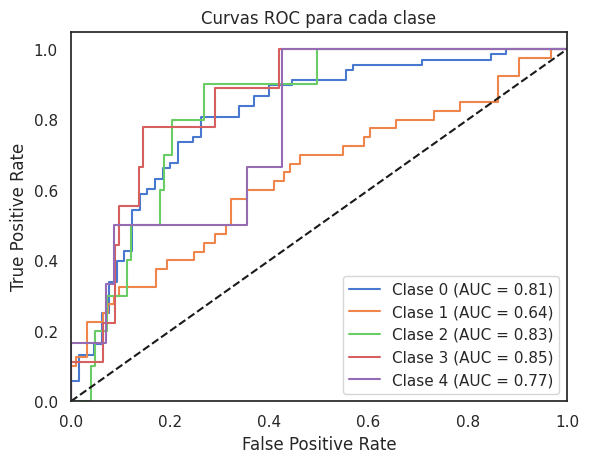

In [57]:
# para poder realizar ROC AUC se podría hacerlo binarizando la variable objetivo
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


# Binarizar las etiquetas para clasificación multiclase
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Realizar predicciones de probabilidades para todas las clases
y_prob = model.predict_proba(X_test)

# Inicializar el gráfico
plt.figure()

# Calcular la curva ROC y el AUC para cada clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {auc:.2f})')

# Plotear la línea diagonal (aleatoria)
plt.plot([0, 1], [0, 1], 'k--')

# Configuración de la gráfica
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para cada clase')
plt.legend(loc="lower right")
plt.show()


In [59]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [62]:
# Definir el espacio de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}


In [63]:
# Crear el modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:57:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [64]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Mejores hiperparámetros encontrados:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [69]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)
print("\n")

Exactitud del mejor modelo: 0.6390977443609023
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        68
           1       0.59      0.47      0.53        40
           2       0.27      0.30      0.29        10
           3       0.22      0.22      0.22         9
           4       0.00      0.00      0.00         6

    accuracy                           0.64       133
   macro avg       0.37      0.38      0.37       133
weighted avg       0.60      0.64      0.61       133

Matriz de Confusión:
[[61  6  1  0  0]
 [15 19  4  2  0]
 [ 1  6  3  0  0]
 [ 4  1  2  2  0]
 [ 0  0  1  5  0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Análisis:
- Los resultados después de la optimización muestran una mejora en la exactitud del modelo, pasando del 57.14% al 63.91%, lo cual es una mejora significativa. Sin embargo, todavía hay espacio para mejorar, especialmente en las clases 2, 3 y 4, donde los modelos aún tienen dificultades para predecir correctamente. Esto puede deberse al desbalanceo de las clases que es bastante notorio.
- 'num': {0:357, 1:204, 2:79, 3:78, 4:22}, si bien el modelo tiene problemas para predecir jsuto las clases con menor cantidad de registros, incluso, cuando num = 4 es bastante poco probable que el modelo prediga este valor

- Informe de clasificación:
    - Clase 0 (la más grande): El modelo mejora en precisión y recall, alcanzando una F1-score de 0.82, lo que indica una predicción bastante buena.
    - Clase 1: Se ha mejorado, pero la F1-score sigue siendo baja (0.53). Es posible que sea una clase difícil de predecir, pero el modelo ha aumentado su recall en comparación con la versión sin optimización.
    - Clase 2: La F1-score sigue siendo baja (0.29), lo que sugiere que el modelo no ha aprendido bien a clasificar esta clase. Es posible que se necesiten más características o un enfoque diferente.
    - Clase 3: La F1-score es de 0.22, indicando que el modelo tiene dificultades para predecir correctamente esta clase.
    - Clase 4: El modelo sigue teniendo un rendimiento muy pobre para esta clase, con una precisión y recall de 0, lo que significa que no se predice ninguna instancia de esta clase correctamente.

- Matriz de confusión:
    - Se observa que la clase 0 sigue siendo bien clasificada, pero las otras clases, especialmente la clase 2, 3 y 4, siguen siendo difíciles de predecir.
    - La clase 1 muestra una mejor distribución entre los diferentes tipos de predicción, pero aún se podría mejorar la precisión y recall.


